In [5]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]
Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]
Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]
Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]
Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnost

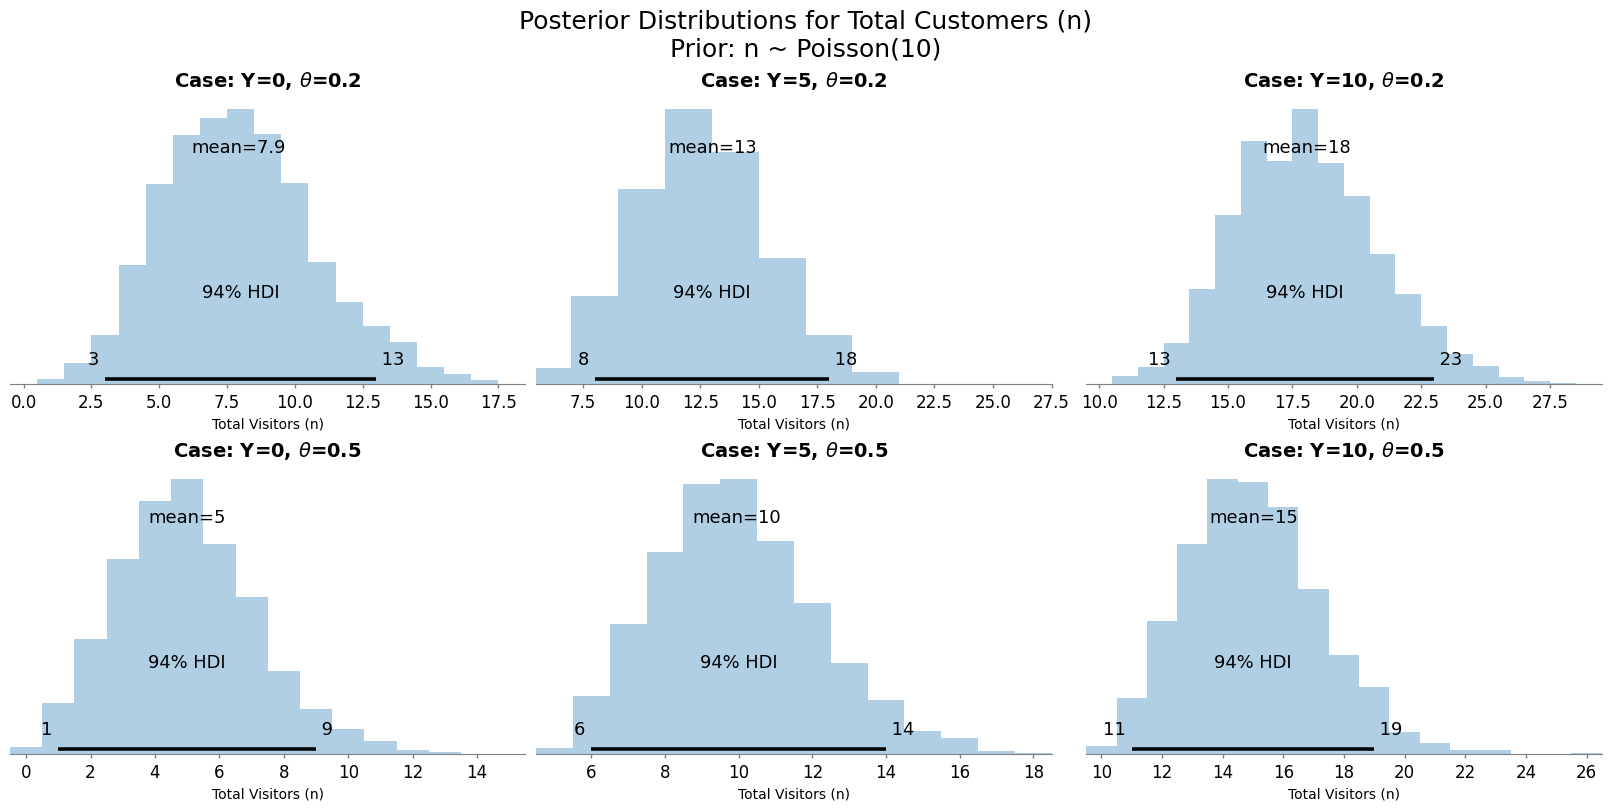

In [6]:
# a)

y_values = [0, 5, 10]
thetas = [0.2, 0.5]

fig, axes = plt.subplots(len(thetas), len(y_values),
                         figsize=(16, 8), constrained_layout=True)

for i, theta in enumerate(thetas):
    for j, y_obs in enumerate(y_values):
        
        with pm.Model() as model:
            n = pm.Poisson("n", mu=10)
            obs = pm.Binomial("obs", n=n, p=theta, observed=y_obs)
            
            idata = pm.sample(
                draws=3000, 
                tune=1000, 
                chains=2, 
                progressbar=False
            )
            
        ax = axes[i, j]
        az.plot_posterior(
            idata, 
            var_names=["n"], 
            ax=ax,
            textsize=12
        )
        
        ax.set_title(f"Case: Y={y_obs}, $\\theta$={theta}", fontsize=14, fontweight='bold')
        ax.set_xlabel("Total Visitors (n)")

fig.suptitle("Posterior Distributions for Total Customers (n)\n" \
             "Prior: n ~ Poisson(10)", fontsize=18)
plt.show()

In [ ]:
# c)

fig, axes = plt.subplots(len(thetas), len(y_values),
                         figsize=(15, 8), constrained_layout=True)

for i, theta in enumerate(thetas):
    for j, y_obs in enumerate(y_values):
        
        with pm.Model() as model:
            n = pm.Poisson("n", mu=10)
            obs = pm.Binomial("obs", n=n, p=theta, observed=y_obs)
            
            idata = pm.sample(
                draws=2000, 
                chains=2, 
                progressbar=False
            )
            
            pm.sample_posterior_predictive(idata, extend_inferencedata=True)
            
        ax = axes[i, j]
        pp_samples = idata.posterior_predictive["obs"]
        az.plot_dist(
            pp_samples, 
            ax=ax,
            kind="hist",
            hist_kwargs={"alpha": 0.6, "edgecolor": "white"}
        )
        
        # Reference line
        ax.axvline(y_obs, color='orange', linestyle='--', label=f'Observed Y={y_obs}')
        ax.set_title(f"Case: Y={y_obs}, $\\theta$={theta}")
        ax.set_xlabel("Future Buyers ($Y^*$)")

plt.show()

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 0 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [obs]


Output()